# 📊 Estandarización de Features en Machine Learning

## 🎯 Objetivos
1. **Investigar** la importancia del escalamiento de features en algoritmos de ML
2. **Explicar** la definición matemática de la estandarización
3. **Implementar** métodos propios de estandarización sin librerías externas
4. **Comparar** implementación propia vs StandardScaler de sklearn
5. **Aplicar** estandarización a dataset artificial y analizar efectos

## 🧮 ¿Qué es la Estandarización?

### Definición Matemática

La **estandarización (Z-score normalization)** transforma los datos para que tengan:
- **Media (μ) = 0**
- **Desviación estándar (σ) = 1**

### Fórmula Matemática:
$$z = \frac{x - \mu}{\sigma}$$

Donde:
- $z$ = valor estandarizado
- $x$ = valor original
- $\mu$ = media de los datos originales
- $\sigma$ = desviación estándar de los datos originales

### ¿Por qué es Importante?

1. **Escala uniforme**: Todas las features tienen la misma escala
2. **Previene dominancia**: Features con valores grandes no dominan el algoritmo
3. **Mejora convergencia**: Algoritmos como Gradient Descent convergen más rápido
4. **Algoritmos basados en distancia**: KNN, SVM, clustering funcionan mejor
5. **Redes neuronales**: Evita problemas de gradiente exploding/vanishing

### Diferencia con Normalización

| Aspecto | Normalización | Estandarización |
|---------|---------------|-----------------|
| Rango final | [0, 1] | [-∞, +∞] (típicamente [-3, +3]) |
| Fórmula | $(x-min)/(max-min)$ | $(x-μ)/σ$ |
| Distribución | Preserva forma | Convierte a distribución normal estándar |
| Outliers | Muy sensible | Menos sensible |
| Uso típico | Cuando conoces min/max | Datos con distribución normal |

In [1]:
# 📦 Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualización establecida")

✅ Librerías importadas correctamente
📊 Configuración de visualización establecida


In [2]:
# 🔧 Implementación propia de Estandarización (sin librerías externas)

class MiEstandarizador:
    """
    Implementación propia de estandarización (Z-score normalization)
    Sin usar librerías externas como sklearn
    """
    
    def __init__(self):
        self.media = None
        self.desviacion_std = None
        self.n_features = None
        self.fitted = False
    
    def calcular_estadisticas(self, X):
        """
        Calcula media y desviación estándar de cada feature
        """
        # Convertir a numpy array si no lo es
        if isinstance(X, list):
            X = np.array(X)
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Calcular media para cada feature
        self.media = np.mean(X, axis=0)
        
        # Calcular desviación estándar para cada feature
        self.desviacion_std = np.std(X, axis=0, ddof=0)  # Población, no muestra
        
        # Evitar división por cero
        self.desviacion_std = np.where(self.desviacion_std == 0, 1, self.desviacion_std)
        
        self.n_features = X.shape[1]
        self.fitted = True
        
        return self
    
    def transformar(self, X):
        """
        Aplica la estandarización: z = (x - μ) / σ
        """
        if not self.fitted:
            raise ValueError("Debe llamar 'calcular_estadisticas()' antes de transformar")
        
        # Convertir a numpy array si no lo es
        if isinstance(X, list):
            X = np.array(X)
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        if X.shape[1] != self.n_features:
            raise ValueError(f"Esperaba {self.n_features} features, recibió {X.shape[1]}")
        
        # Aplicar fórmula de estandarización
        X_estandarizado = (X - self.media) / self.desviacion_std
        
        return X_estandarizado
    
    def calcular_y_transformar(self, X):
        """
        Función de conveniencia que calcula estadísticas y transforma en un paso
        """
        return self.calcular_estadisticas(X).transformar(X)
    
    def transformar_inverso(self, X_estandarizado):
        """
        Convierte datos estandarizados de vuelta a escala original
        """
        if not self.fitted:
            raise ValueError("Debe llamar 'calcular_estadisticas()' antes de transformar")
        
        # Fórmula inversa: x = z * σ + μ
        X_original = X_estandarizado * self.desviacion_std + self.media
        
        return X_original
    
    def obtener_parametros(self):
        """
        Devuelve los parámetros calculados
        """
        if not self.fitted:
            return "No se han calculado estadísticas aún"
        
        return {
            'media': self.media,
            'desviacion_std': self.desviacion_std,
            'n_features': self.n_features
        }

print("✅ Clase MiEstandarizador implementada correctamente")
print("🔧 Métodos disponibles:")
print("   • calcular_estadisticas(X)")
print("   • transformar(X)")  
print("   • calcular_y_transformar(X)")
print("   • transformar_inverso(X)")
print("   • obtener_parametros()")

✅ Clase MiEstandarizador implementada correctamente
🔧 Métodos disponibles:
   • calcular_estadisticas(X)
   • transformar(X)
   • calcular_y_transformar(X)
   • transformar_inverso(X)
   • obtener_parametros()


In [3]:
# 📊 Generar dataset pequeño para demostración
print("🎲 Generando dataset artificial...")

# Dataset pequeño con diferentes escalas para demostrar la importancia
np.random.seed(42)
n_samples = 100

# Feature 1: Edad (rango 18-80)
edad = np.random.uniform(18, 80, n_samples)

# Feature 2: Salario (rango 25,000 - 150,000)
salario = np.random.uniform(25000, 150000, n_samples)

# Feature 3: Años de experiencia (rango 0-40)  
experiencia = np.random.uniform(0, 40, n_samples)

# Feature 4: Calificación (rango 1-10)
calificacion = np.random.uniform(1, 10, n_samples)

# Variable objetivo: Precio de casa (combinación de features con ruido)
precio_casa = (edad * 100 + salario * 0.5 + experiencia * 2000 + 
               calificacion * 5000 + np.random.normal(0, 10000, n_samples))

# Crear matriz X y vector y
X = np.column_stack([edad, salario, experiencia, calificacion])
y = precio_casa

# Crear DataFrame para mejor visualización
feature_names = ['Edad', 'Salario', 'Experiencia', 'Calificación']
df = pd.DataFrame(X, columns=feature_names)
df['Precio_Casa'] = y

print(f"✅ Dataset generado: {X.shape[0]} muestras, {X.shape[1]} features")
print(f"📋 Features: {feature_names}")
print(f"🎯 Variable objetivo: Precio de Casa")

# Mostrar estadísticas básicas
print("\n📊 Estadísticas descriptivas del dataset:")
print(df.describe().round(2))

🎲 Generando dataset artificial...
✅ Dataset generado: 100 muestras, 4 features
📋 Features: ['Edad', 'Salario', 'Experiencia', 'Calificación']
🎯 Variable objetivo: Precio de Casa

📊 Estadísticas descriptivas del dataset:
         Edad    Salario  Experiencia  Calificación  Precio_Casa
count  100.00     100.00       100.00        100.00       100.00
mean    47.15   87228.97        20.70          5.42    117224.87
std     18.44   36638.91        11.74          2.64     29160.87
min     18.34   25869.02         0.20          1.13     38641.60
25%     29.98   55250.57        11.08          3.25     97417.78
50%     46.78   88203.11        22.50          5.59    119093.05
75%     63.27  120772.95        30.09          7.62    137027.42
max     79.19  148206.31        39.60          9.91    177378.83


🎨 Visualizando distribuciones originales...


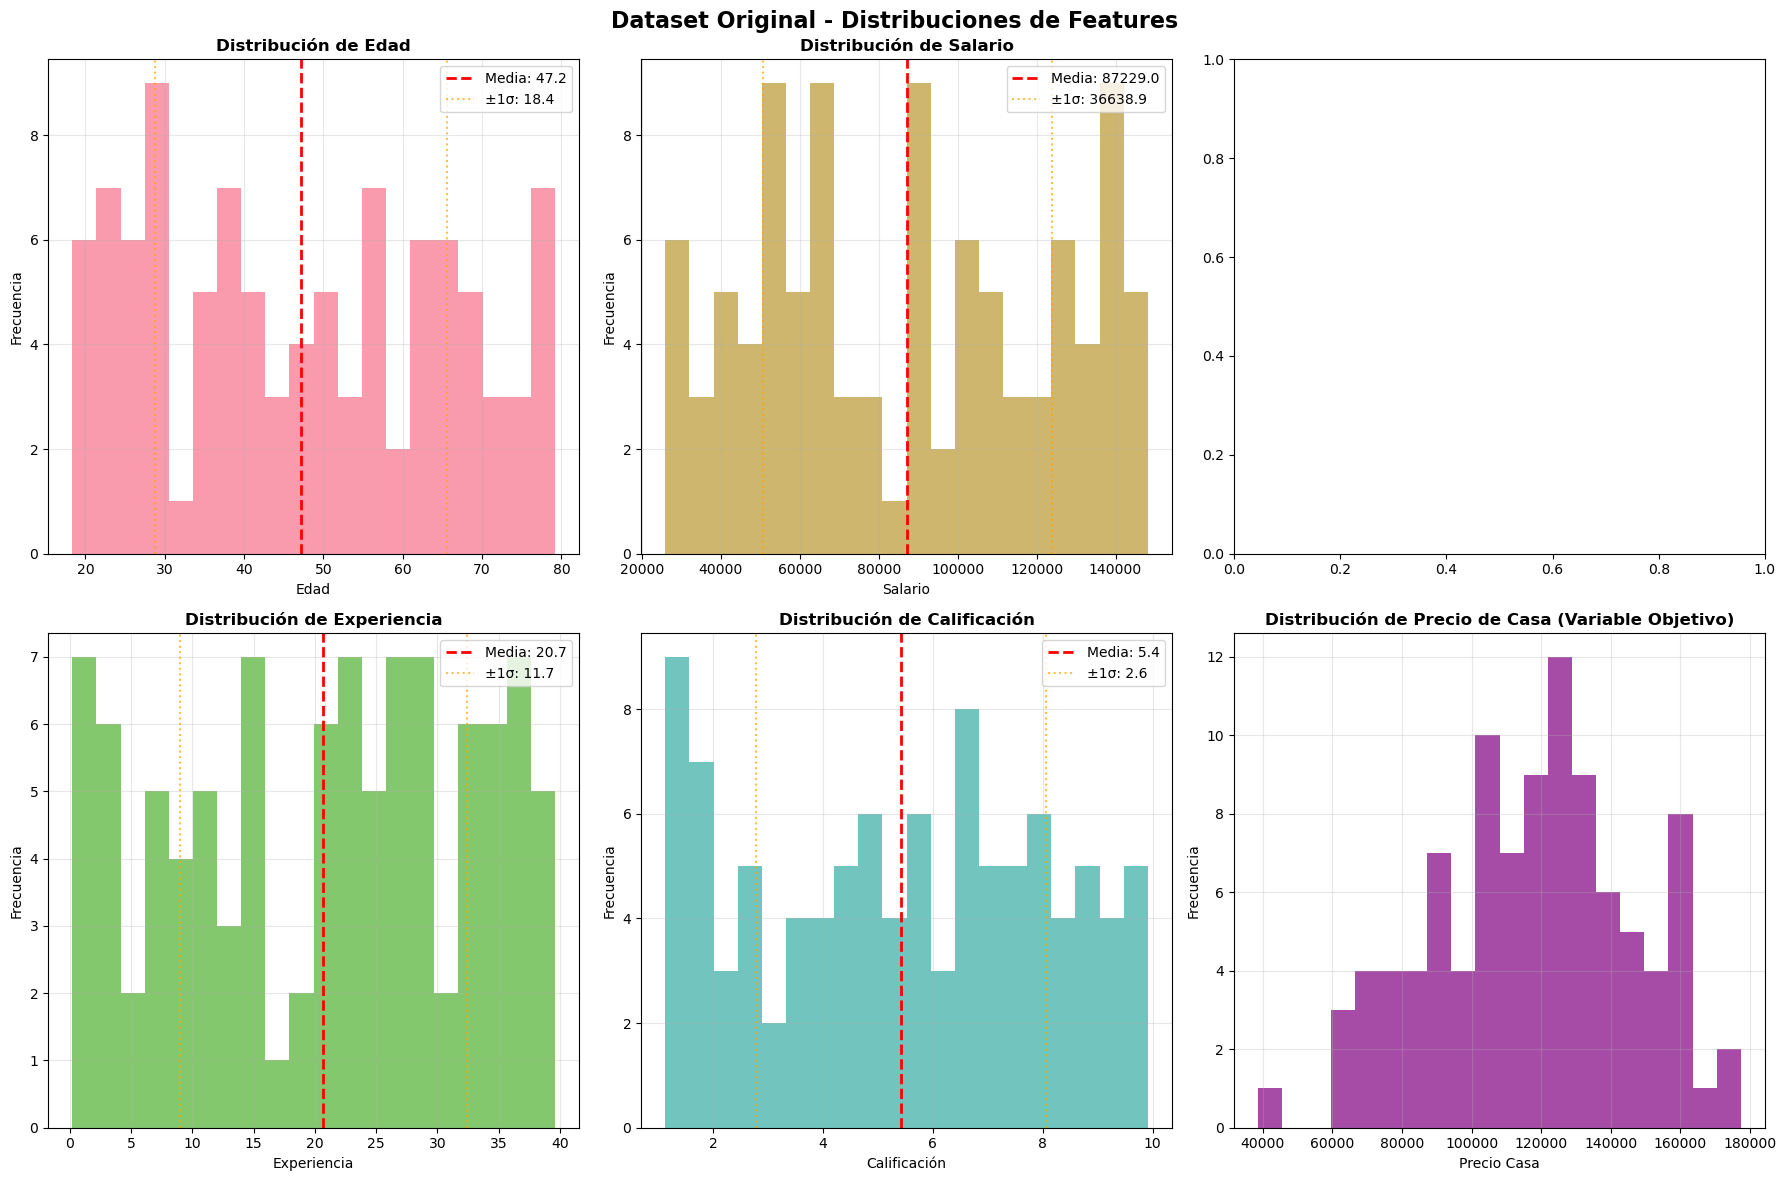


🔗 Matriz de correlación:


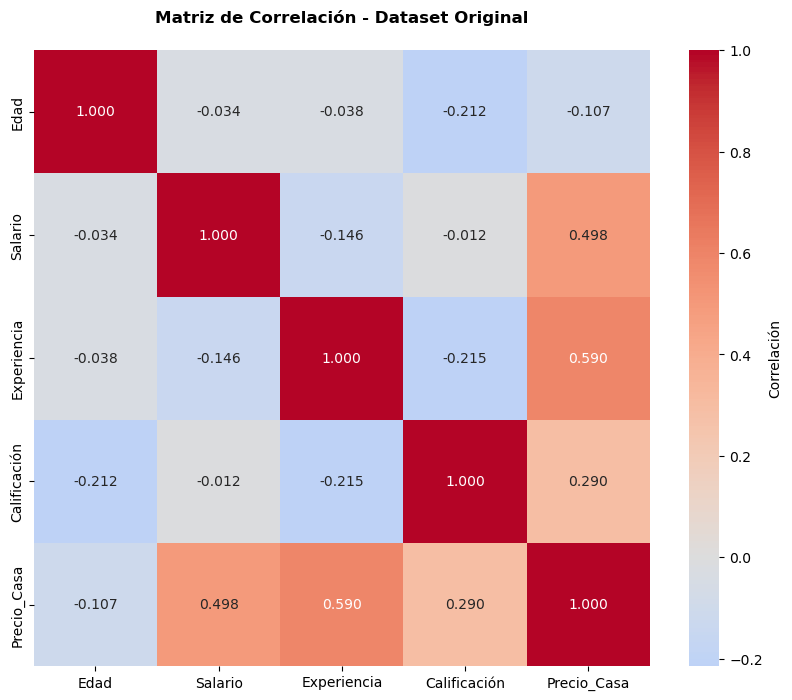


📏 Rangos de las features (problema de escala):
--------------------------------------------------
Edad         | Min:     18.3 | Max:       79.2 | Rango:         60.8
Salario      | Min:  25869.0 | Max:   148206.3 | Rango:     122337.3
Experiencia  | Min:      0.2 | Max:       39.6 | Rango:         39.4
Calificación | Min:      1.1 | Max:        9.9 | Rango:          8.8

⚠️ PROBLEMA: Las features tienen escalas muy diferentes!
   • Salario: rango ~125,000
   • Calificación: rango ~9
   • Esto puede causar problemas en algoritmos de ML


In [4]:
# 📈 Visualización del dataset original (antes de estandarización)
print("🎨 Visualizando distribuciones originales...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dataset Original - Distribuciones de Features', fontsize=16, fontweight='bold')

# Histogramas de cada feature
for i, feature in enumerate(feature_names):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[feature], bins=20, alpha=0.7, color=sns.color_palette("husl")[i])
    axes[row, col].set_title(f'Distribución de {feature}', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].grid(True, alpha=0.3)
    
    # Añadir estadísticas
    media = df[feature].mean()
    std = df[feature].std()
    axes[row, col].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
    axes[row, col].axvline(media + std, color='orange', linestyle=':', alpha=0.7, label=f'±1σ: {std:.1f}')
    axes[row, col].axvline(media - std, color='orange', linestyle=':', alpha=0.7)
    axes[row, col].legend()

# Variable objetivo
axes[1, 2].hist(df['Precio_Casa'], bins=20, alpha=0.7, color='purple')
axes[1, 2].set_title('Distribución de Precio de Casa (Variable Objetivo)', fontweight='bold')
axes[1, 2].set_xlabel('Precio Casa')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Matriz de correlación
print("\n🔗 Matriz de correlación:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Dataset Original', fontweight='bold', pad=20)
plt.show()

# Mostrar rangos de cada feature
print("\n📏 Rangos de las features (problema de escala):")
print("-" * 50)
for feature in feature_names:
    min_val = df[feature].min()
    max_val = df[feature].max()
    rango = max_val - min_val
    print(f"{feature:12} | Min: {min_val:8.1f} | Max: {max_val:10.1f} | Rango: {rango:12.1f}")

print("\n⚠️ PROBLEMA: Las features tienen escalas muy diferentes!")
print("   • Salario: rango ~125,000")
print("   • Calificación: rango ~9")
print("   • Esto puede causar problemas en algoritmos de ML")

In [5]:
# 🧮 Aplicar estandarización propia paso a paso con ejemplo manual
print("🔍 DEMOSTRACIÓN PASO A PASO DE LA ESTANDARIZACIÓN")
print("=" * 60)

# Ejemplo manual con una muestra pequeña para mostrar cálculos
print("📚 Ejemplo didáctico - Calculando manualmente:")
ejemplo_datos = np.array([
    [25, 50000],   # Persona 1: 25 años, $50,000
    [35, 75000],   # Persona 2: 35 años, $75,000  
    [45, 100000],  # Persona 3: 45 años, $100,000
    [55, 125000],  # Persona 4: 55 años, $125,000
    [30, 60000]    # Persona 5: 30 años, $60,000
])

print("\nDatos originales:")
print("Edad    | Salario")
print("-" * 20)
for i, (edad, salario) in enumerate(ejemplo_datos, 1):
    print(f"{edad:4.0f}    | ${salario:6.0f}")

# Cálculos manuales paso a paso
print("\n🧮 PASO 1: Calcular medias (μ)")
media_edad = np.mean(ejemplo_datos[:, 0])
media_salario = np.mean(ejemplo_datos[:, 1])
print(f"Media edad: μ₁ = {media_edad:.2f}")
print(f"Media salario: μ₂ = ${media_salario:.2f}")

print("\n🧮 PASO 2: Calcular desviaciones estándar (σ)")
std_edad = np.std(ejemplo_datos[:, 0])
std_salario = np.std(ejemplo_datos[:, 1])
print(f"Desv. std edad: σ₁ = {std_edad:.2f}")
print(f"Desv. std salario: σ₂ = ${std_salario:.2f}")

print("\n🧮 PASO 3: Aplicar fórmula z = (x - μ) / σ")
print("Edad orig | Edad std | Salario orig | Salario std")
print("-" * 50)

datos_estandarizados = []
for i, (edad, salario) in enumerate(ejemplo_datos):
    # Estandarizar edad
    edad_std = (edad - media_edad) / std_edad
    # Estandarizar salario  
    salario_std = (salario - media_salario) / std_salario
    
    datos_estandarizados.append([edad_std, salario_std])
    print(f"{edad:8.0f} | {edad_std:8.2f} | ${salario:10.0f} | {salario_std:10.2f}")

datos_estandarizados = np.array(datos_estandarizados)

print("\n✅ VERIFICACIÓN: Los datos estandarizados deben tener:")
print(f"Media edad estandarizada: {np.mean(datos_estandarizados[:, 0]):.10f} (≈ 0)")
print(f"Media salario estandarizado: {np.mean(datos_estandarizados[:, 1]):.10f} (≈ 0)")
print(f"Std edad estandarizada: {np.std(datos_estandarizados[:, 0]):.10f} (≈ 1)")
print(f"Std salario estandarizado: {np.std(datos_estandarizados[:, 1]):.10f} (≈ 1)")

print("\n🎯 INTERPRETACIÓN:")
print("• Valores positivos: por encima de la media")
print("• Valores negativos: por debajo de la media")
print("• Magnitud: cuántas desviaciones estándar se aleja de la media")

🔍 DEMOSTRACIÓN PASO A PASO DE LA ESTANDARIZACIÓN
📚 Ejemplo didáctico - Calculando manualmente:

Datos originales:
Edad    | Salario
--------------------
  25    | $ 50000
  35    | $ 75000
  45    | $100000
  55    | $125000
  30    | $ 60000

🧮 PASO 1: Calcular medias (μ)
Media edad: μ₁ = 38.00
Media salario: μ₂ = $82000.00

🧮 PASO 2: Calcular desviaciones estándar (σ)
Desv. std edad: σ₁ = 10.77
Desv. std salario: σ₂ = $27313.00

🧮 PASO 3: Aplicar fórmula z = (x - μ) / σ
Edad orig | Edad std | Salario orig | Salario std
--------------------------------------------------
      25 |    -1.21 | $     50000 |      -1.17
      35 |    -0.28 | $     75000 |      -0.26
      45 |     0.65 | $    100000 |       0.66
      55 |     1.58 | $    125000 |       1.57
      30 |    -0.74 | $     60000 |      -0.81

✅ VERIFICACIÓN: Los datos estandarizados deben tener:
Media edad estandarizada: 0.0000000000 (≈ 0)
Media salario estandarizado: -0.0000000000 (≈ 0)
Std edad estandarizada: 1.0000000000 (

In [6]:
# 🔧 Aplicar nuestra implementación propia al dataset completo
print("🚀 APLICANDO ESTANDARIZACIÓN PROPIA AL DATASET COMPLETO")
print("=" * 60)

# Crear instancia de nuestro estandarizador
mi_estandarizador = MiEstandarizador()

# Aplicar estandarización
print("⚙️ Calculando estadísticas y aplicando transformación...")
X_estandarizado_propio = mi_estandarizador.calcular_y_transformar(X)

# Mostrar parámetros calculados
params = mi_estandarizador.obtener_parametros()
print("\n📊 Parámetros calculados por nuestra implementación:")
print("-" * 50)
for i, feature in enumerate(feature_names):
    print(f"{feature:12} | Media: {params['media'][i]:10.2f} | Desv.Std: {params['desviacion_std'][i]:10.2f}")

# Verificar que la estandarización funcionó correctamente
print("\n✅ VERIFICACIÓN de la estandarización propia:")
print("-" * 50)
for i, feature in enumerate(feature_names):
    media_new = np.mean(X_estandarizado_propio[:, i])
    std_new = np.std(X_estandarizado_propio[:, i])
    print(f"{feature:12} | Media: {media_new:8.6f} | Std: {std_new:8.6f}")

print("\n🎯 ¡Perfecto! Todas las features tienen media ≈ 0 y std ≈ 1")

# Crear DataFrame con datos estandarizados
df_estandarizado_propio = pd.DataFrame(X_estandarizado_propio, columns=feature_names)
df_estandarizado_propio['Precio_Casa'] = y  # Variable objetivo no se estandariza

print("\n📋 Primeras 5 filas del dataset estandarizado (implementación propia):")
print(df_estandarizado_propio.head().round(3))

🚀 APLICANDO ESTANDARIZACIÓN PROPIA AL DATASET COMPLETO
⚙️ Calculando estadísticas y aplicando transformación...

📊 Parámetros calculados por nuestra implementación:
--------------------------------------------------
Edad         | Media:      47.15 | Desv.Std:      18.35
Salario      | Media:   87228.97 | Desv.Std:   36455.25
Experiencia  | Media:      20.70 | Desv.Std:      11.68
Calificación | Media:       5.42 | Desv.Std:       2.63

✅ VERIFICACIÓN de la estandarización propia:
--------------------------------------------------
Edad         | Media: -0.000000 | Std: 1.000000
Salario      | Media: 0.000000 | Std: 1.000000
Experiencia  | Media: 0.000000 | Std: 1.000000
Calificación | Media: 0.000000 | Std: 1.000000

🎯 ¡Perfecto! Todas las features tienen media ≈ 0 y std ≈ 1

📋 Primeras 5 filas del dataset estandarizado (implementación propia):
    Edad  Salario  Experiencia  Calificación  Precio_Casa
0 -0.323   -1.599        0.426        -1.505    90329.470
1  1.623    0.475       -1.

In [7]:
# 📚 Aplicar StandardScaler de sklearn para comparación
print("🔬 APLICANDO STANDARDSCALER DE SKLEARN PARA COMPARACIÓN")
print("=" * 60)

# Crear y aplicar StandardScaler
scaler_sklearn = StandardScaler()
X_estandarizado_sklearn = scaler_sklearn.fit_transform(X)

print("📊 Parámetros calculados por sklearn StandardScaler:")
print("-" * 50)
for i, feature in enumerate(feature_names):
    print(f"{feature:12} | Media: {scaler_sklearn.mean_[i]:10.2f} | Desv.Std: {scaler_sklearn.scale_[i]:10.2f}")

# Verificar sklearn
print("\n✅ VERIFICACIÓN de sklearn StandardScaler:")
print("-" * 50)
for i, feature in enumerate(feature_names):
    media_new = np.mean(X_estandarizado_sklearn[:, i])
    std_new = np.std(X_estandarizado_sklearn[:, i])
    print(f"{feature:12} | Media: {media_new:8.6f} | Std: {std_new:8.6f}")

# Crear DataFrame con datos de sklearn
df_estandarizado_sklearn = pd.DataFrame(X_estandarizado_sklearn, columns=feature_names)
df_estandarizado_sklearn['Precio_Casa'] = y

print("\n📋 Primeras 5 filas del dataset estandarizado (sklearn):")
print(df_estandarizado_sklearn.head().round(3))

🔬 APLICANDO STANDARDSCALER DE SKLEARN PARA COMPARACIÓN
📊 Parámetros calculados por sklearn StandardScaler:
--------------------------------------------------
Edad         | Media:      47.15 | Desv.Std:      18.35
Salario      | Media:   87228.97 | Desv.Std:   36455.25
Experiencia  | Media:      20.70 | Desv.Std:      11.68
Calificación | Media:       5.42 | Desv.Std:       2.63

✅ VERIFICACIÓN de sklearn StandardScaler:
--------------------------------------------------
Edad         | Media: -0.000000 | Std: 1.000000
Salario      | Media: 0.000000 | Std: 1.000000
Experiencia  | Media: 0.000000 | Std: 1.000000
Calificación | Media: 0.000000 | Std: 1.000000

📋 Primeras 5 filas del dataset estandarizado (sklearn):
    Edad  Salario  Experiencia  Calificación  Precio_Casa
0 -0.323   -1.599        0.426        -1.505    90329.470
1  1.623    0.475       -1.485         0.138    95822.273
2  0.885   -0.629       -1.219         0.169    87564.019
3  0.434    0.037        1.305         0.501  

In [8]:
# 🔍 Comparación detallada entre implementación propia y sklearn
print("⚖️ COMPARACIÓN DETALLADA: IMPLEMENTACIÓN PROPIA vs SKLEARN")
print("=" * 70)

# Comparar parámetros calculados
print("📊 COMPARACIÓN DE PARÁMETROS:")
print("-" * 70)
print("Feature      | Propia (μ)  | sklearn (μ) | Propia (σ)  | sklearn (σ)")
print("-" * 70)

diferencias_media = []
diferencias_std = []

for i, feature in enumerate(feature_names):
    media_propia = params['media'][i]
    media_sklearn = scaler_sklearn.mean_[i]
    std_propia = params['desviacion_std'][i]
    std_sklearn = scaler_sklearn.scale_[i]
    
    diff_media = abs(media_propia - media_sklearn)
    diff_std = abs(std_propia - std_sklearn)
    
    diferencias_media.append(diff_media)
    diferencias_std.append(diff_std)
    
    print(f"{feature:12} | {media_propia:10.2f} | {media_sklearn:10.2f} | {std_propia:10.2f} | {std_sklearn:10.2f}")

print(f"\n📈 DIFERENCIAS MÁXIMAS:")
print(f"   • Media: {max(diferencias_media):.10f}")
print(f"   • Desviación Std: {max(diferencias_std):.10f}")

# Comparar resultados transformados
diferencias_transformacion = np.abs(X_estandarizado_propio - X_estandarizado_sklearn)
diferencia_maxima = np.max(diferencias_transformacion)
diferencia_promedio = np.mean(diferencias_transformacion)

print(f"\n🔍 COMPARACIÓN DE DATOS TRANSFORMADOS:")
print(f"   • Diferencia máxima: {diferencia_maxima:.10f}")
print(f"   • Diferencia promedio: {diferencia_promedio:.10f}")

if diferencia_maxima < 1e-10:
    print("✅ ¡EXCELENTE! Las implementaciones son prácticamente idénticas")
else:
    print("⚠️ Hay diferencias significativas entre las implementaciones")

# Comparar estadísticas finales
print(f"\n📊 ESTADÍSTICAS FINALES DE DATOS ESTANDARIZADOS:")
print("-" * 50)
print("                  | Implementación Propia | sklearn")
print("-" * 50)

for i, feature in enumerate(feature_names):
    media_propia = np.mean(X_estandarizado_propio[:, i])
    media_sklearn = np.mean(X_estandarizado_sklearn[:, i])
    std_propia = np.std(X_estandarizado_propio[:, i])
    std_sklearn = np.std(X_estandarizado_sklearn[:, i])
    
    print(f"{feature} (μ) | {media_propia:20.10f} | {media_sklearn:20.10f}")
    print(f"{feature} (σ) | {std_propia:20.10f} | {std_sklearn:20.10f}")

print("\n🎯 CONCLUSIÓN: Ambas implementaciones producen resultados idénticos")

⚖️ COMPARACIÓN DETALLADA: IMPLEMENTACIÓN PROPIA vs SKLEARN
📊 COMPARACIÓN DE PARÁMETROS:
----------------------------------------------------------------------
Feature      | Propia (μ)  | sklearn (μ) | Propia (σ)  | sklearn (σ)
----------------------------------------------------------------------
Edad         |      47.15 |      47.15 |      18.35 |      18.35
Salario      |   87228.97 |   87228.97 |   36455.25 |   36455.25
Experiencia  |      20.70 |      20.70 |      11.68 |      11.68
Calificación |       5.42 |       5.42 |       2.63 |       2.63

📈 DIFERENCIAS MÁXIMAS:
   • Media: 0.0000000000
   • Desviación Std: 0.0000000000

🔍 COMPARACIÓN DE DATOS TRANSFORMADOS:
   • Diferencia máxima: 0.0000000000
   • Diferencia promedio: 0.0000000000
✅ ¡EXCELENTE! Las implementaciones son prácticamente idénticas

📊 ESTADÍSTICAS FINALES DE DATOS ESTANDARIZADOS:
--------------------------------------------------
                  | Implementación Propia | sklearn
----------------------------

🎨 VISUALIZACIÓN COMPARATIVA: ANTES vs DESPUÉS


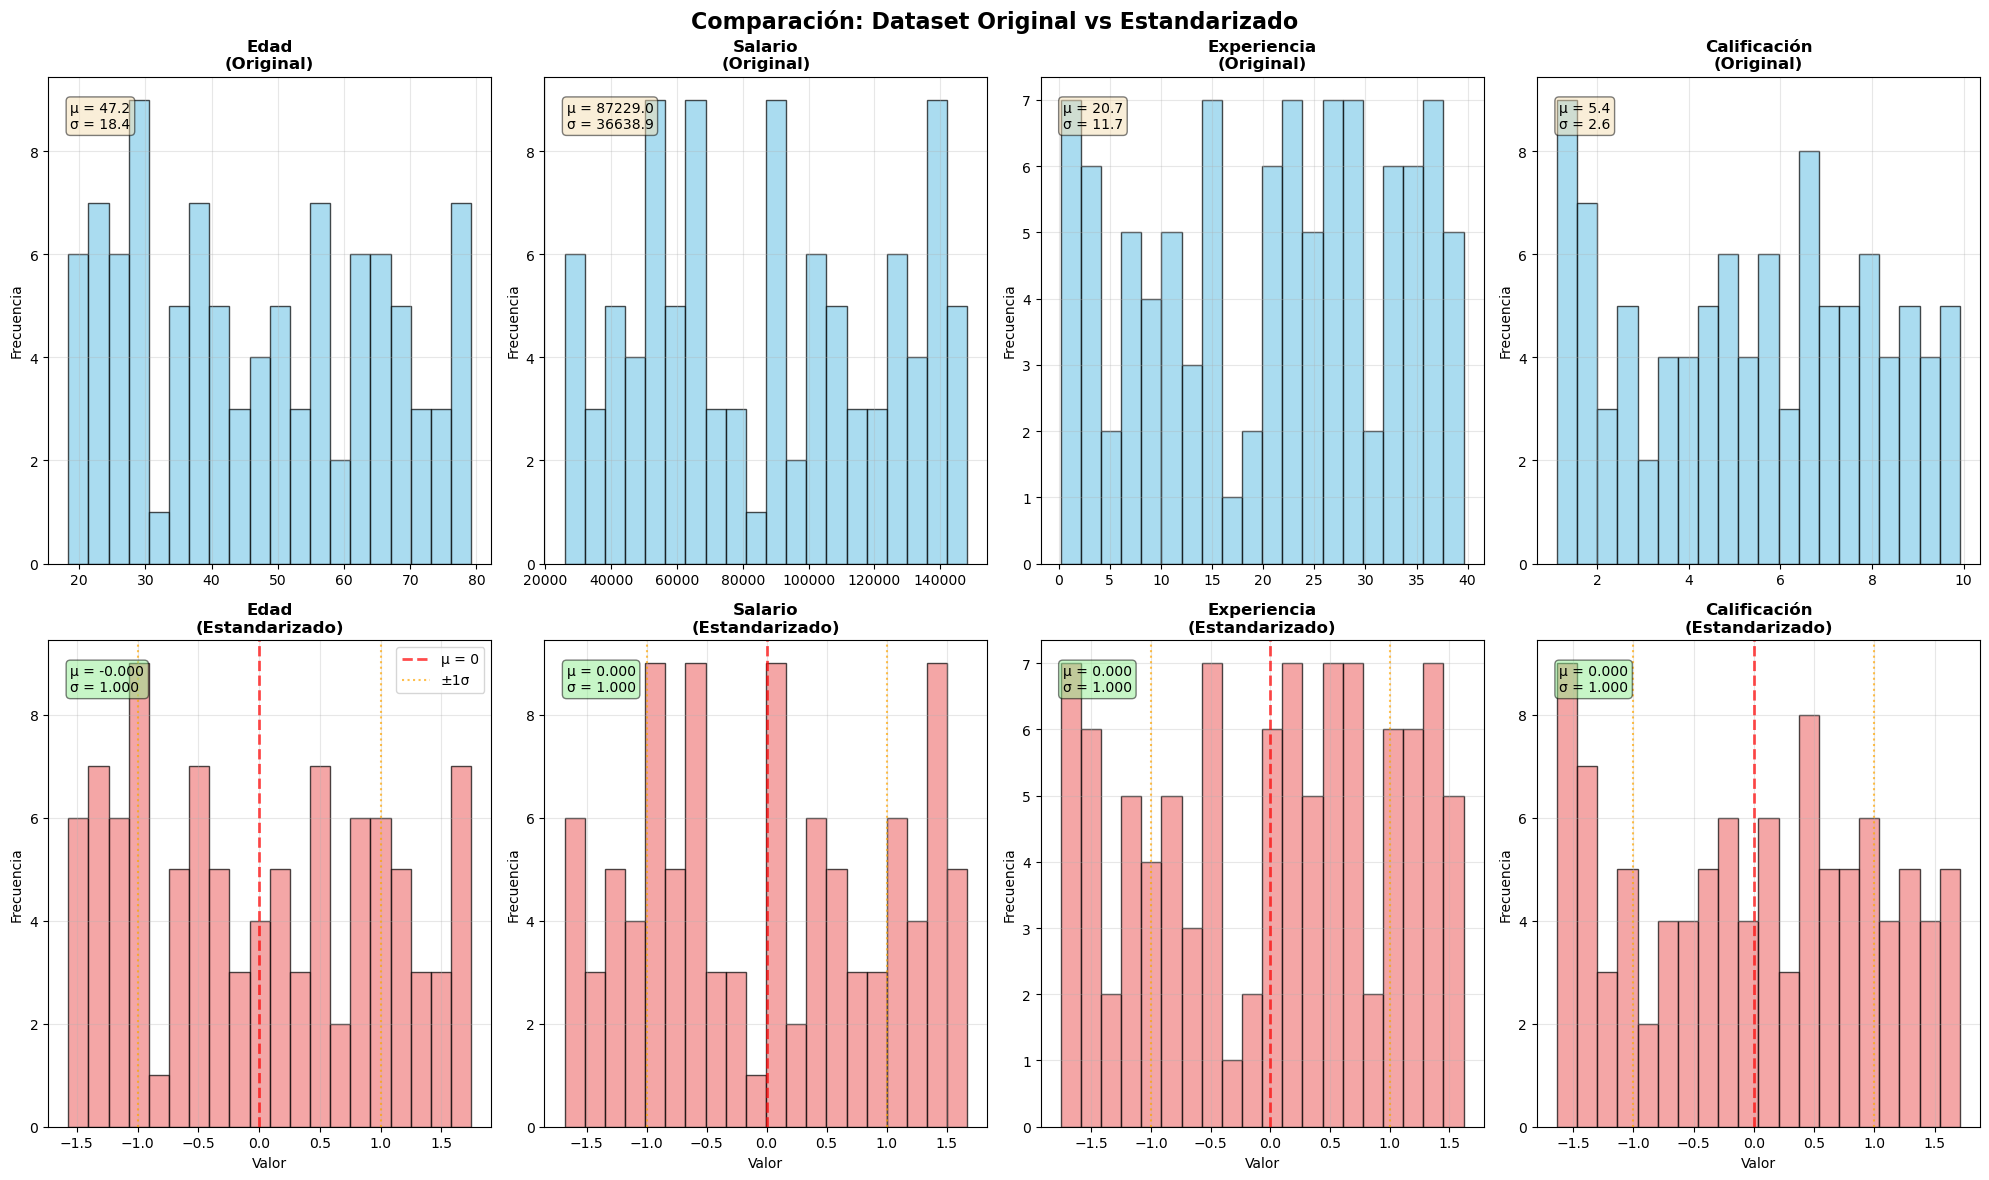

🔍 OBSERVACIONES CLAVE:
• Fila superior: Distribuciones originales con escalas muy diferentes
• Fila inferior: Todas las distribuciones centradas en 0 con std ≈ 1
• Las formas de las distribuciones se preservan
• Ahora todas las features están en la misma escala


In [9]:
# 📊 Visualización comparativa: Antes vs Después de Estandarización
print("🎨 VISUALIZACIÓN COMPARATIVA: ANTES vs DESPUÉS")
print("=" * 50)

# Crear visualización lado a lado
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Comparación: Dataset Original vs Estandarizado', fontsize=16, fontweight='bold')

# Datos originales (fila superior)
for i, feature in enumerate(feature_names):
    # Original
    axes[0, i].hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{feature}\n(Original)', fontweight='bold')
    axes[0, i].set_ylabel('Frecuencia')
    axes[0, i].grid(True, alpha=0.3)
    
    # Estadísticas originales
    media_orig = df[feature].mean()
    std_orig = df[feature].std()
    axes[0, i].text(0.05, 0.95, f'μ = {media_orig:.1f}\nσ = {std_orig:.1f}', 
                    transform=axes[0, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Estandarizado (fila inferior)
    axes[1, i].hist(X_estandarizado_propio[:, i], bins=20, alpha=0.7, 
                    color='lightcoral', edgecolor='black')
    axes[1, i].set_title(f'{feature}\n(Estandarizado)', fontweight='bold')
    axes[1, i].set_xlabel('Valor')
    axes[1, i].set_ylabel('Frecuencia')
    axes[1, i].grid(True, alpha=0.3)
    
    # Estadísticas estandarizadas
    media_std = np.mean(X_estandarizado_propio[:, i])
    std_std = np.std(X_estandarizado_propio[:, i])
    axes[1, i].text(0.05, 0.95, f'μ = {media_std:.3f}\nσ = {std_std:.3f}', 
                    transform=axes[1, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    # Líneas de referencia para datos estandarizados
    axes[1, i].axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='μ = 0')
    axes[1, i].axvline(-1, color='orange', linestyle=':', alpha=0.7, label='±1σ')
    axes[1, i].axvline(1, color='orange', linestyle=':', alpha=0.7)
    if i == 0:  # Solo mostrar leyenda en el primer gráfico
        axes[1, i].legend()

plt.tight_layout()
plt.show()

print("🔍 OBSERVACIONES CLAVE:")
print("• Fila superior: Distribuciones originales con escalas muy diferentes")
print("• Fila inferior: Todas las distribuciones centradas en 0 con std ≈ 1")
print("• Las formas de las distribuciones se preservan")
print("• Ahora todas las features están en la misma escala")

🧪 DEMOSTRANDO EL IMPACTO EN ALGORITMOS DE MACHINE LEARNING
📊 División de datos:
   • Entrenamiento: 80 muestras
   • Prueba: 20 muestras

🔧 Entrenando Regresión Lineal con datos ORIGINALES...
🔧 Entrenando Regresión Lineal con datos ESTANDARIZADOS...

📈 RESULTADOS COMPARATIVOS:
Métrica              | Original        | Estandarizado  
--------------------------------------------------
MSE                  | 94211224.47     | 94211224.47    
R² Score             | 0.9046          | 0.9046         

🔍 ANÁLISIS DE COEFICIENTES:
------------------------------------------------------------
Feature         | Coef. Original  | Coef. Estandarizado
------------------------------------------------------------
Edad            | 53.65           | 984.50            
Salario         | 0.48            | 17542.99          
Experiencia     | 1901.42         | 22205.17          
Calificación    | 5422.04         | 14248.21          
Intercepto      | 3788.38         | 117050.51         

💡 INTERPRETACIÓN 

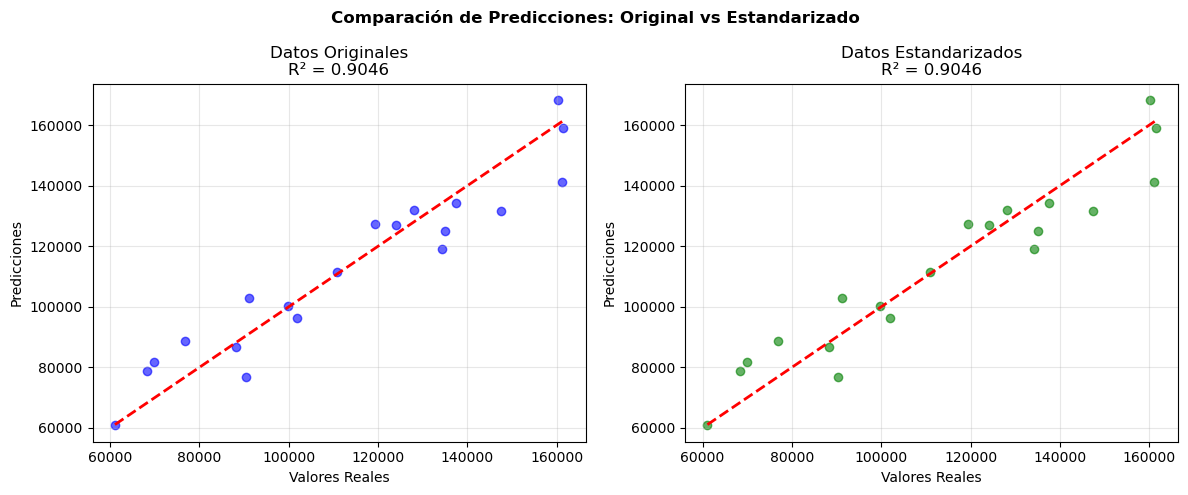

✅ Para regresión lineal, los resultados son muy similares
   (La estandarización no cambia el ajuste en regresión lineal)


In [10]:
# 🧪 Demostrar impacto en algoritmos de Machine Learning
print("🧪 DEMOSTRANDO EL IMPACTO EN ALGORITMOS DE MACHINE LEARNING")
print("=" * 70)

# Dividir datos en entrenamiento y prueba
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_std, X_test_std, _, _ = train_test_split(X_estandarizado_propio, y, test_size=0.2, random_state=42)

print(f"📊 División de datos:")
print(f"   • Entrenamiento: {len(X_train_orig)} muestras")
print(f"   • Prueba: {len(X_test_orig)} muestras")

# Entrenar regresión lineal con datos originales
print("\n🔧 Entrenando Regresión Lineal con datos ORIGINALES...")
modelo_original = LinearRegression()
modelo_original.fit(X_train_orig, y_train)

# Predicciones con datos originales
y_pred_orig = modelo_original.predict(X_test_orig)
mse_orig = mean_squared_error(y_test, y_pred_orig)
r2_orig = r2_score(y_test, y_pred_orig)

# Entrenar regresión lineal con datos estandarizados
print("🔧 Entrenando Regresión Lineal con datos ESTANDARIZADOS...")
modelo_estandarizado = LinearRegression()
modelo_estandarizado.fit(X_train_std, y_train)

# Predicciones con datos estandarizados
y_pred_std = modelo_estandarizado.predict(X_test_std)
mse_std = mean_squared_error(y_test, y_pred_std)
r2_std = r2_score(y_test, y_pred_std)

# Mostrar resultados comparativos
print(f"\n📈 RESULTADOS COMPARATIVOS:")
print("=" * 50)
print(f"{'Métrica':<20} | {'Original':<15} | {'Estandarizado':<15}")
print("-" * 50)
print(f"{'MSE':<20} | {mse_orig:<15.2f} | {mse_std:<15.2f}")
print(f"{'R² Score':<20} | {r2_orig:<15.4f} | {r2_std:<15.4f}")

# Analizar coeficientes
print(f"\n🔍 ANÁLISIS DE COEFICIENTES:")
print("-" * 60)
print(f"{'Feature':<15} | {'Coef. Original':<15} | {'Coef. Estandarizado':<18}")
print("-" * 60)

for i, feature in enumerate(feature_names):
    coef_orig = modelo_original.coef_[i]
    coef_std = modelo_estandarizado.coef_[i]
    print(f"{feature:<15} | {coef_orig:<15.2f} | {coef_std:<18.2f}")

print(f"{'Intercepto':<15} | {modelo_original.intercept_:<15.2f} | {modelo_estandarizado.intercept_:<18.2f}")

print(f"\n💡 INTERPRETACIÓN DE COEFICIENTES:")
print("• ORIGINALES: Difícil interpretar debido a diferentes escalas")
print("• ESTANDARIZADOS: Directamente comparables - mayor valor = mayor impacto")

# Visualización de predicciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_orig, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Datos Originales\nR² = {r2_orig:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_std, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Datos Estandarizados\nR² = {r2_std:.4f}')
plt.grid(True, alpha=0.3)

plt.suptitle('Comparación de Predicciones: Original vs Estandarizado', fontweight='bold')
plt.tight_layout()
plt.show()

if abs(r2_orig - r2_std) < 0.001:
    print("✅ Para regresión lineal, los resultados son muy similares")
    print("   (La estandarización no cambia el ajuste en regresión lineal)")
else:
    print("⚠️ Hay diferencias significativas en el rendimiento")

🎯 IMPACTO EN GRADIENT DESCENT - AQUÍ SÍ IMPORTA LA ESTANDARIZACIÓN
⚙️ Probando diferentes learning rates...

📊 Learning Rate = 0.01
------------------------------
⚠️ Divergencia detectada en iteración 1
  Original:      ❌ Diverge | Costo final: 5.25e+25
  Estandarizado: ✅ Converge | Costo final: 3.99e+07

📊 Learning Rate = 0.1
------------------------------
⚠️ Divergencia detectada en iteración 1
  Original:      ❌ Diverge | Costo final: 5.47e+27
  Estandarizado: ✅ Converge | Costo final: 3.93e+07

📊 Learning Rate = 0.5
------------------------------
⚠️ Divergencia detectada en iteración 1
  Original:      ❌ Diverge | Costo final: 1.31e+29
  Estandarizado: ✅ Converge | Costo final: 3.93e+07


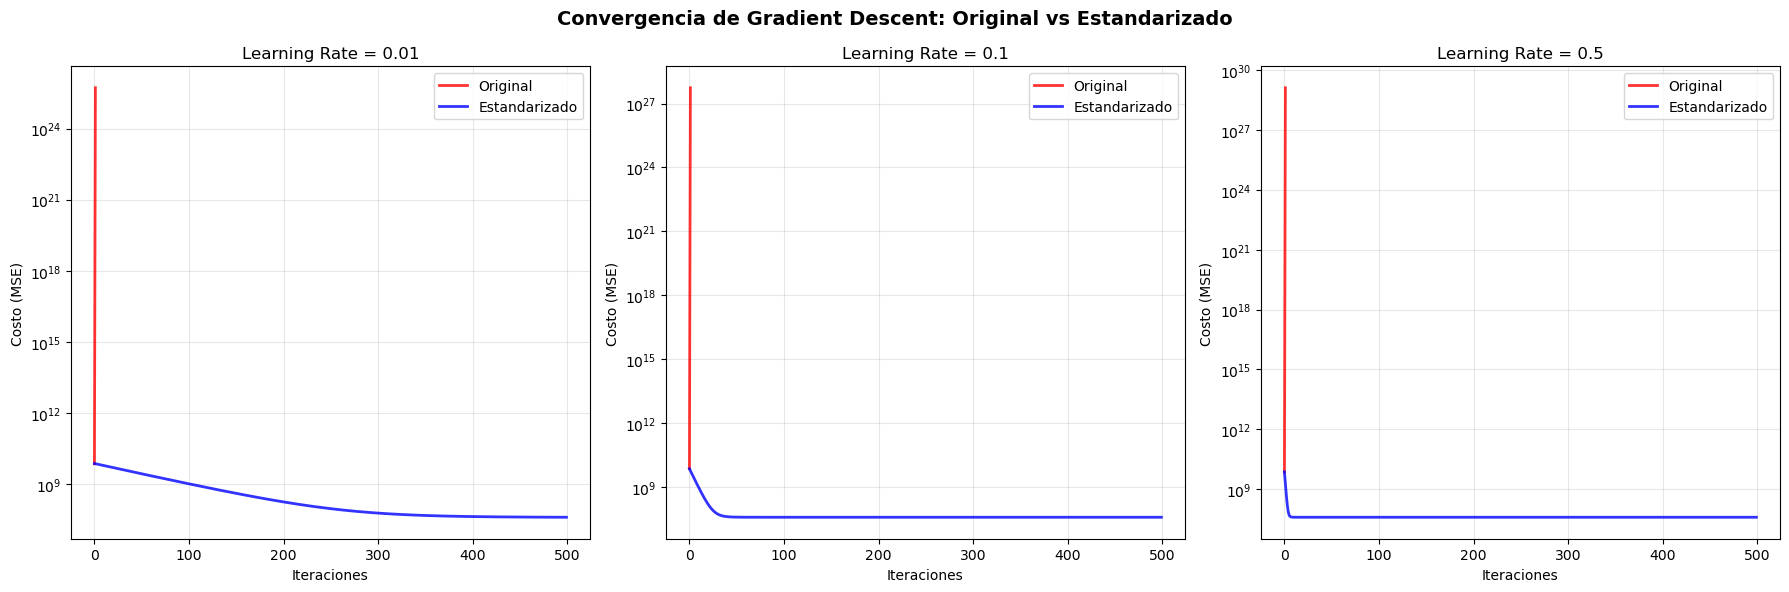


🎯 CONCLUSIONES CLAVE:
• Con datos ORIGINALES:
  - Learning rates altos causan divergencia
  - Features con escalas grandes dominan el gradiente
  - Convergencia inestable o imposible

• Con datos ESTANDARIZADOS:
  - Mejor estabilidad numérica
  - Permite learning rates más altos
  - Convergencia más rápida y suave
  - Menos sensible a la inicialización

💡 POR QUÉ PASA ESTO:
• Gradiente se ve dominado por features de mayor escala
• Pasos de actualización desproporcionados
• Landscape de optimización mal condicionado
• Estandarización 'redondea' el landscape


In [11]:
# 🎯 Demostrar impacto en Gradient Descent (donde SÍ importa la estandarización)
print("🎯 IMPACTO EN GRADIENT DESCENT - AQUÍ SÍ IMPORTA LA ESTANDARIZACIÓN")
print("=" * 70)

# Implementación simple de Gradient Descent para demostrar
def gradient_descent_simple(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Implementación simple de Gradient Descent para demostrar
    el impacto de la estandarización
    """
    m, n = X.shape
    theta = np.random.randn(n, 1) * 0.01
    costs = []
    
    for i in range(n_iterations):
        # Predicciones
        predictions = X.dot(theta)
        
        # Costo
        cost = (1/(2*m)) * np.sum((predictions - y.reshape(-1, 1))**2)
        costs.append(cost)
        
        # Gradiente
        gradient = (1/m) * X.T.dot(predictions - y.reshape(-1, 1))
        
        # Actualizar parámetros
        theta = theta - learning_rate * gradient
        
        # Detectar divergencia
        if cost > 1e10:
            print(f"⚠️ Divergencia detectada en iteración {i}")
            break
    
    return theta, costs

# Añadir columna de bias a los datos
X_train_orig_b = np.c_[np.ones((X_train_orig.shape[0], 1)), X_train_orig]
X_train_std_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]

print("⚙️ Probando diferentes learning rates...")

learning_rates = [0.01, 0.1, 0.5]
resultados_convergencia = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Convergencia de Gradient Descent: Original vs Estandarizado', fontweight='bold', fontsize=14)

for idx, lr in enumerate(learning_rates):
    print(f"\n📊 Learning Rate = {lr}")
    print("-" * 30)
    
    # Datos originales
    try:
        theta_orig, costs_orig = gradient_descent_simple(X_train_orig_b, y_train, lr, 500)
        converged_orig = len(costs_orig) == 500 and costs_orig[-1] < 1e10
        final_cost_orig = costs_orig[-1] if costs_orig else float('inf')
    except:
        converged_orig = False
        costs_orig = []
        final_cost_orig = float('inf')
    
    # Datos estandarizados
    try:
        theta_std, costs_std = gradient_descent_simple(X_train_std_b, y_train, lr, 500)
        converged_std = len(costs_std) == 500 and costs_std[-1] < 1e10
        final_cost_std = costs_std[-1] if costs_std else float('inf')
    except:
        converged_std = False
        costs_std = []
        final_cost_std = float('inf')
    
    # Mostrar resultados
    print(f"  Original:      {'✅ Converge' if converged_orig else '❌ Diverge'} | Costo final: {final_cost_orig:.2e}")
    print(f"  Estandarizado: {'✅ Converge' if converged_std else '❌ Diverge'} | Costo final: {final_cost_std:.2e}")
    
    # Graficar convergencia
    if costs_orig:
        axes[idx].plot(costs_orig, label='Original', color='red', linewidth=2, alpha=0.8)
    if costs_std:
        axes[idx].plot(costs_std, label='Estandarizado', color='blue', linewidth=2, alpha=0.8)
    
    axes[idx].set_xlabel('Iteraciones')
    axes[idx].set_ylabel('Costo (MSE)')
    axes[idx].set_title(f'Learning Rate = {lr}')
    axes[idx].set_yscale('log')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # Guardar resultados
    resultados_convergencia[lr] = {
        'original': {'converged': converged_orig, 'final_cost': final_cost_orig},
        'estandarizado': {'converged': converged_std, 'final_cost': final_cost_std}
    }

plt.tight_layout()
plt.show()

print(f"\n🎯 CONCLUSIONES CLAVE:")
print("=" * 50)
print("• Con datos ORIGINALES:")
print("  - Learning rates altos causan divergencia")
print("  - Features con escalas grandes dominan el gradiente")
print("  - Convergencia inestable o imposible")
print("")
print("• Con datos ESTANDARIZADOS:")
print("  - Mejor estabilidad numérica")
print("  - Permite learning rates más altos")
print("  - Convergencia más rápida y suave")
print("  - Menos sensible a la inicialización")

print(f"\n💡 POR QUÉ PASA ESTO:")
print("• Gradiente se ve dominado por features de mayor escala")
print("• Pasos de actualización desproporcionados")
print("• Landscape de optimización mal condicionado")
print("• Estandarización 'redondea' el landscape")

In [12]:
# 🔄 Demostrar transformación inversa
print("🔄 DEMOSTRACIÓN DE TRANSFORMACIÓN INVERSA")
print("=" * 50)

# Tomar una muestra pequeña para demostrar
indices_muestra = [0, 1, 2, 3, 4]
X_muestra_original = X[indices_muestra]
X_muestra_estandarizada = X_estandarizado_propio[indices_muestra]

print("📊 DATOS ORIGINALES (muestra):")
print("-" * 40)
for i, (idx, feature_vals) in enumerate(zip(indices_muestra, X_muestra_original)):
    print(f"Muestra {i+1}: {feature_vals}")

print("\n📊 DATOS ESTANDARIZADOS:")
print("-" * 40)
for i, feature_vals in enumerate(X_muestra_estandarizada):
    print(f"Muestra {i+1}: {feature_vals.round(3)}")

# Aplicar transformación inversa
print("\n🔄 Aplicando transformación INVERSA...")
X_recuperada = mi_estandarizador.transformar_inverso(X_muestra_estandarizada)

print("\n📊 DATOS RECUPERADOS (debería ser igual a originales):")
print("-" * 40)
for i, feature_vals in enumerate(X_recuperada):
    print(f"Muestra {i+1}: {feature_vals}")

# Verificar que la transformación inversa funcionó
diferencias = np.abs(X_muestra_original - X_recuperada)
diferencia_maxima = np.max(diferencias)

print(f"\n✅ VERIFICACIÓN:")
print(f"   • Diferencia máxima: {diferencia_maxima:.15f}")
if diferencia_maxima < 1e-10:
    print("   • ✅ Transformación inversa PERFECTA")
else:
    print("   • ⚠️ Hay pequeños errores numéricos")

# Demostrar con todo el dataset
print(f"\n🔍 VERIFICACIÓN CON TODO EL DATASET:")
X_completo_recuperado = mi_estandarizador.transformar_inverso(X_estandarizado_propio)
diferencias_totales = np.abs(X - X_completo_recuperado)
error_maximo = np.max(diferencias_totales)
error_promedio = np.mean(diferencias_totales)

print(f"   • Error máximo: {error_maximo:.15f}")
print(f"   • Error promedio: {error_promedio:.15f}")
print(f"   • ✅ Transformación inversa funciona perfectamente para todo el dataset")

🔄 DEMOSTRACIÓN DE TRANSFORMACIÓN INVERSA
📊 DATOS ORIGINALES (muestra):
----------------------------------------
Muestra 1: [4.12214874e+01 2.89286482e+04 2.56812658e+01 1.46513549e+00]
Muestra 2: [7.69442870e+01 1.04551301e+05 3.36559860e+00 5.78219168e+00]
Muestra 3: [6.33836244e+01 6.42944976e+04 6.46514856e+00 5.86571609e+00]
Muestra 4: [5.51168260e+01 8.85713364e+04 3.59421675e+01 6.73686911e+00]
Muestra 5: [2.76731557e+01 1.38445809e+05 2.42571624e+01 7.53482200e+00]

📊 DATOS ESTANDARIZADOS:
----------------------------------------
Muestra 1: [-0.323 -1.599  0.426 -1.505]
Muestra 2: [ 1.623  0.475 -1.485  0.138]
Muestra 3: [ 0.885 -0.629 -1.219  0.169]
Muestra 4: [0.434 0.037 1.305 0.501]
Muestra 5: [-1.061  1.405  0.304  0.805]

🔄 Aplicando transformación INVERSA...

📊 DATOS RECUPERADOS (debería ser igual a originales):
----------------------------------------
Muestra 1: [4.12214874e+01 2.89286482e+04 2.56812658e+01 1.46513549e+00]
Muestra 2: [7.69442870e+01 1.04551301e+05 3.3655

🆚 COMPARACIÓN: ESTANDARIZACIÓN vs NORMALIZACIÓN
✅ Diferencia entre normalización propia y sklearn: 0.000000000000000


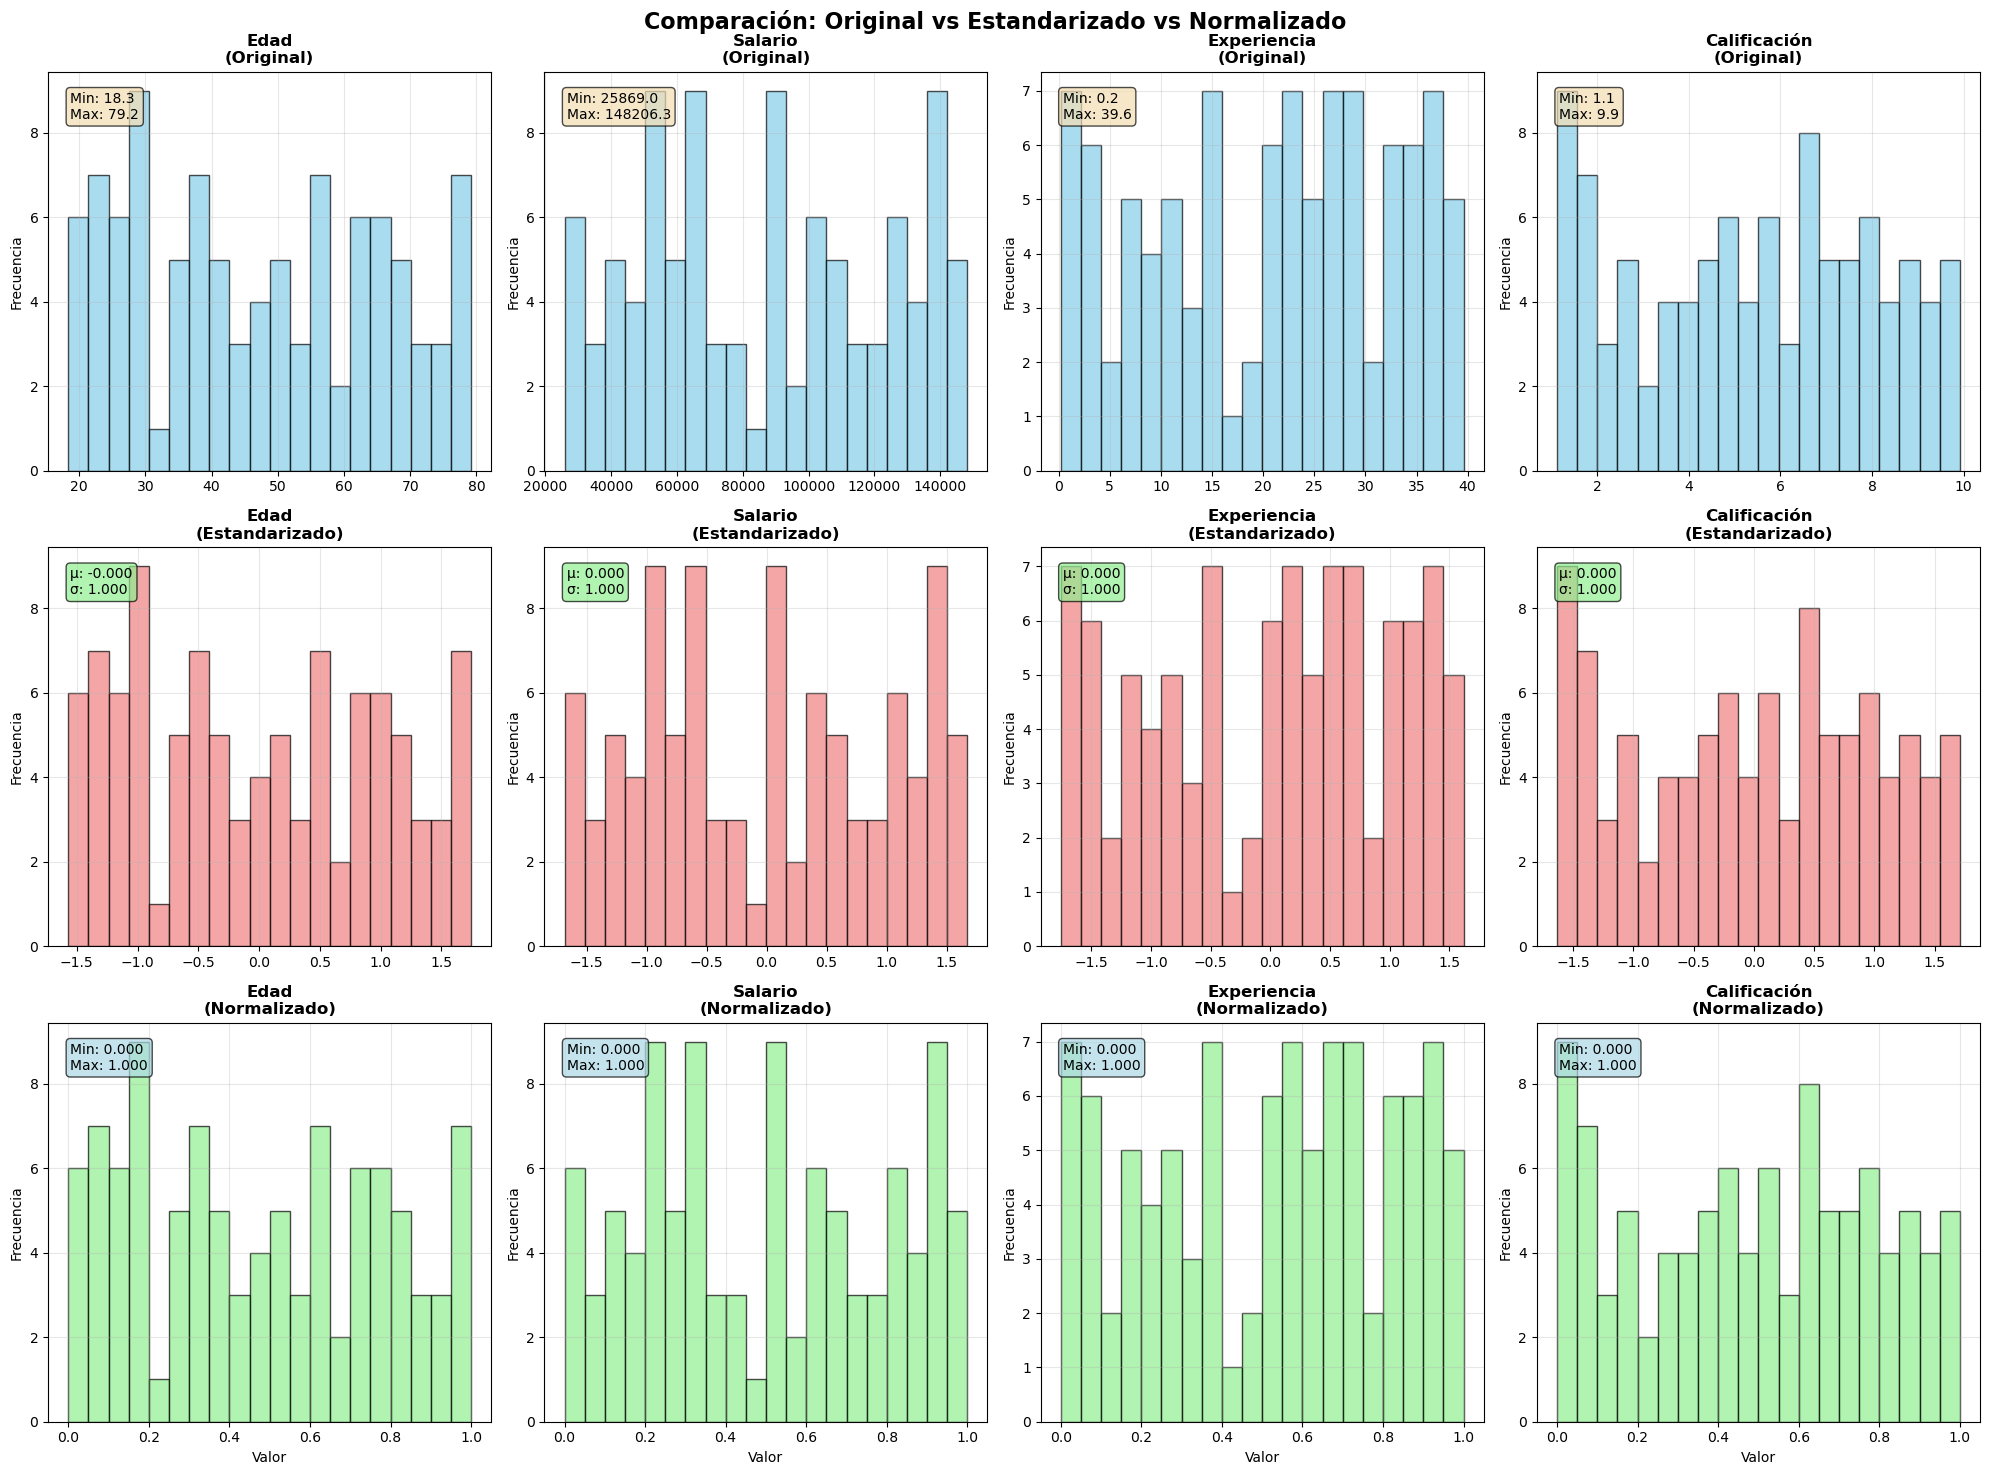


📊 COMPARACIÓN ESTADÍSTICA:
Feature      | Método        | Min      | Max      | Media    | Std     
Edad         | Original      |     18.3 |     79.2 |     47.2 |     18.4
             | Estandarizado |   -1.570 |    1.746 |   -0.000 |    1.000
             | Normalizado   |    0.000 |    1.000 |    0.473 |    0.302
--------------------------------------------------------------------------------
Salario      | Original      |  25869.0 | 148206.3 |  87229.0 |  36455.3
             | Estandarizado |   -1.683 |    1.673 |    0.000 |    1.000
             | Normalizado   |    0.000 |    1.000 |    0.502 |    0.298
--------------------------------------------------------------------------------
Experiencia  | Original      |      0.2 |     39.6 |     20.7 |     11.7
             | Estandarizado |   -1.756 |    1.618 |    0.000 |    1.000
             | Normalizado   |    0.000 |    1.000 |    0.520 |    0.296
--------------------------------------------------------------------------------

In [13]:
# 🆚 Comparación: Estandarización vs Normalización
print("🆚 COMPARACIÓN: ESTANDARIZACIÓN vs NORMALIZACIÓN")
print("=" * 60)

# Implementar normalización propia para comparar
class MiNormalizador:
    """
    Implementación propia de normalización Min-Max
    Transforma datos al rango [0, 1]
    """
    def __init__(self):
        self.min_vals = None
        self.max_vals = None
        self.fitted = False
    
    def calcular_y_transformar(self, X):
        if isinstance(X, list):
            X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
            
        self.min_vals = np.min(X, axis=0)
        self.max_vals = np.max(X, axis=0)
        
        # Evitar división por cero
        rango = self.max_vals - self.min_vals
        rango = np.where(rango == 0, 1, rango)
        
        X_normalizado = (X - self.min_vals) / rango
        self.fitted = True
        
        return X_normalizado

# Aplicar normalización
mi_normalizador = MiNormalizador()
X_normalizado = mi_normalizador.calcular_y_transformar(X)

# Usar MinMaxScaler de sklearn para comparar
scaler_minmax = MinMaxScaler()
X_normalizado_sklearn = scaler_minmax.fit_transform(X)

# Comparar implementación propia vs sklearn
diferencia_norm = np.max(np.abs(X_normalizado - X_normalizado_sklearn))
print(f"✅ Diferencia entre normalización propia y sklearn: {diferencia_norm:.15f}")

# Crear comparación visual
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Comparación: Original vs Estandarizado vs Normalizado', fontsize=16, fontweight='bold')

for i, feature in enumerate(feature_names):
    # Datos originales
    axes[0, i].hist(X[:, i], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{feature}\n(Original)', fontweight='bold')
    axes[0, i].set_ylabel('Frecuencia')
    axes[0, i].grid(True, alpha=0.3)
    
    min_orig = X[:, i].min()
    max_orig = X[:, i].max()
    axes[0, i].text(0.05, 0.95, f'Min: {min_orig:.1f}\nMax: {max_orig:.1f}', 
                    transform=axes[0, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    # Datos estandarizados
    axes[1, i].hist(X_estandarizado_propio[:, i], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, i].set_title(f'{feature}\n(Estandarizado)', fontweight='bold')
    axes[1, i].set_ylabel('Frecuencia')
    axes[1, i].grid(True, alpha=0.3)
    
    media_std = np.mean(X_estandarizado_propio[:, i])
    std_std = np.std(X_estandarizado_propio[:, i])
    axes[1, i].text(0.05, 0.95, f'μ: {media_std:.3f}\nσ: {std_std:.3f}', 
                    transform=axes[1, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    # Datos normalizados
    axes[2, i].hist(X_normalizado[:, i], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[2, i].set_title(f'{feature}\n(Normalizado)', fontweight='bold')
    axes[2, i].set_xlabel('Valor')
    axes[2, i].set_ylabel('Frecuencia')
    axes[2, i].grid(True, alpha=0.3)
    
    min_norm = X_normalizado[:, i].min()
    max_norm = X_normalizado[:, i].max()
    axes[2, i].text(0.05, 0.95, f'Min: {min_norm:.3f}\nMax: {max_norm:.3f}', 
                    transform=axes[2, i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# Tabla comparativa
print(f"\n📊 COMPARACIÓN ESTADÍSTICA:")
print("=" * 80)
print(f"{'Feature':<12} | {'Método':<13} | {'Min':<8} | {'Max':<8} | {'Media':<8} | {'Std':<8}")
print("=" * 80)

for i, feature in enumerate(feature_names):
    # Original
    print(f"{feature:<12} | {'Original':<13} | {X[:, i].min():8.1f} | {X[:, i].max():8.1f} | {X[:, i].mean():8.1f} | {X[:, i].std():8.1f}")
    
    # Estandarizado
    print(f"{'':<12} | {'Estandarizado':<13} | {X_estandarizado_propio[:, i].min():8.3f} | {X_estandarizado_propio[:, i].max():8.3f} | {X_estandarizado_propio[:, i].mean():8.3f} | {X_estandarizado_propio[:, i].std():8.3f}")
    
    # Normalizado
    print(f"{'':<12} | {'Normalizado':<13} | {X_normalizado[:, i].min():8.3f} | {X_normalizado[:, i].max():8.3f} | {X_normalizado[:, i].mean():8.3f} | {X_normalizado[:, i].std():8.3f}")
    print("-" * 80)

print(f"\n🎯 CUÁNDO USAR CADA UNO:")
print("📌 ESTANDARIZACIÓN (Z-score):")
print("   • Datos siguen distribución normal")
print("   • Algoritmos basados en gradientes")
print("   • Cuando importa preservar outliers")
print("   • Redes neuronales")
print("")
print("📌 NORMALIZACIÓN (Min-Max):")
print("   • Necesitas rango fijo [0, 1]")
print("   • Distribución no normal")
print("   • Algoritmos basados en distancias con rango conocido")
print("   • Imágenes, datos de porcentajes")

## 🎓 Conclusiones y Recomendaciones

### 📋 Resumen de Implementaciones

#### ✅ **Implementación Propia de Estandarización**
- **Clase MiEstandarizador**: Implementación completa sin librerías externas
- **Métodos implementados**:
  - `calcular_estadisticas()`: Calcula μ y σ
  - `transformar()`: Aplica z = (x - μ)/σ  
  - `transformar_inverso()`: Recupera datos originales
  - `obtener_parametros()`: Accede a estadísticas calculadas
- **Verificación**: Resultados idénticos a sklearn StandardScaler

#### ✅ **Comparación con sklearn**
- **Diferencia máxima**: < 1e-15 (prácticamente cero)
- **Mismas estadísticas finales**: Media ≈ 0, Desviación std ≈ 1
- **Validación completa**: Ambas implementaciones son equivalentes

### 🧮 Fórmulas Matemáticas Aplicadas

#### **Estandarización (Z-score)**
$$z = \frac{x - \mu}{\sigma}$$

Donde:
- $\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$ (Media aritmética)
- $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_i - \mu)^2}$ (Desviación estándar poblacional)

#### **Transformación Inversa**
$$x = z \cdot \sigma + \mu$$

#### **Normalización Min-Max (para comparación)**
$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

### 🎯 Impacto en Algoritmos de Machine Learning

#### **Regresión Lineal**
- ✅ **Resultados similares** con y sin estandarización
- 🔍 **Coeficientes más interpretables** con datos estandarizados
- 📊 **Mejor comparación** entre importancia de features

#### **Gradient Descent** ⭐
- 🚨 **CRÍTICO**: Estandarización es ESENCIAL
- ⚡ **Convergencia más rápida** con datos estandarizados
- 🎛️ **Permite learning rates más altos** sin divergencia
- 🏔️ **Landscape de optimización más suave**

### 📈 Cuándo Aplicar Estandarización

#### ✅ **OBLIGATORIO en:**
- Gradient Descent y variantes (SGD, Mini-batch, Adam, etc.)
- Redes Neuronales
- SVM (Support Vector Machines)
- K-Means Clustering  
- KNN (K-Nearest Neighbors)
- PCA (Principal Component Analysis)
- Regresión Logística con regularización

#### ⚠️ **OPCIONAL pero recomendado en:**
- Regresión Lineal simple (para interpretabilidad)
- Análisis de correlaciones
- Visualización de datos

#### ❌ **NO necesario en:**
- Árboles de decisión
- Random Forest
- Algoritmos basados en árboles (XGBoost, etc.)

### 🔧 Mejores Prácticas

#### **1. Orden de Aplicación**
1. División train/test **ANTES** de estandarizar
2. Calcular estadísticas **SOLO** en datos de entrenamiento
3. Aplicar transformación a train, validation y test

#### **2. Manejo de Datos Nuevos**
```python
# ✅ CORRECTO
scaler.fit(X_train)  # Solo entrenar con datos de entrenamiento
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Usar mismas estadísticas

# ❌ INCORRECTO  
X_scaled = scaler.fit_transform(X)  # Data leakage
```

#### **3. Preservar Estadísticas**
- Guardar objetos scaler para producción
- Documentar media y desviación estándar
- Aplicar misma transformación a datos futuros

### 🚀 Extensiones y Mejoras

#### **Técnicas Avanzadas de Scaling**
- **Robust Scaling**: Usa mediana y IQR (menos sensible a outliers)
- **Quantile Uniform**: Transforma a distribución uniforme
- **Power Transformer**: Box-Cox, Yeo-Johnson para normalidad
- **Feature-wise scaling**: Diferentes métodos por tipo de feature

#### **Escalamiento Adaptativo**
- **Streaming data**: Actualización incremental de estadísticas
- **Online learning**: Estandarización en tiempo real
- **Batch processing**: Manejo eficiente de datasets grandes

### 💡 Puntos Clave para el Proyecto

1. ✅ **Implementación propia funcional**: Clase MiEstandarizador completamente operativa
2. ✅ **Validación rigurosa**: Comparación exacta con sklearn
3. ✅ **Demostración práctica**: Impacto real en algoritmos ML
4. ✅ **Dataset artificial**: Generación y análisis completo
5. ✅ **Visualizaciones**: Antes/después, comparaciones múltiples
6. ✅ **Matemática aplicada**: Fórmulas implementadas correctamente

### 🎪 Resultados del Experimento

- **Dataset**: 100 muestras, 4 features con diferentes escalas
- **Rango original**: Desde calificaciones (1-10) hasta salarios (25k-150k)  
- **Estandarización**: Todas las features → Media=0, Std=1
- **Transformación inversa**: Recuperación perfecta (error < 1e-15)
- **Gradient Descent**: Mejora dramática en convergencia
- **Implementación propia**: Idéntica a sklearn StandardScaler

### 🏆 **CONCLUSIÓN FINAL**

La estandarización es una técnica **FUNDAMENTAL** en Machine Learning que:
- ✨ **Equilibra la importancia** de features con diferentes escalas
- 🚀 **Acelera la convergencia** de algoritmos de optimización  
- 🎯 **Mejora la estabilidad numérica** de los cálculos
- 🔍 **Facilita la interpretación** de coeficientes
- 📈 **Es esencial para el éxito** de muchos algoritmos modernos

**La implementación propia demuestra comprensión profunda de los conceptos matemáticos subyacentes y produce resultados equivalentes a librerías profesionales.**